# Michał Kowalik L3a / L3b / L4b

## Cwiczenie 1 (3 pkt) - Kernelized Linear Regression

Dane pochodzą z rozkładu y_i = m*x_i + b + N(0, 1). 

Na podstawie 101 przykładów z rozkładu policz estymator MLE następującego modelu:

a) $$ p(y | x) = N(<x, w> + b, \sigma^2) = <x, w> + b + N(0, \sigma^2) $$. Równoważne $\phi(x) = [1, x]$ (patrz podpunkt b)

b) $$ p(y | x) = N(<\phi(x), w>, \sigma^2) = <\phi(x), w> + N(0, \sigma^2) $$, gdzie $\phi(x) = [1, x, x^2, x^3, x^4]$

Kod powinien być opakowany w klase ToyLinearRegression z metodami fit oraz predict. ToyLinearRegression powinien przyjmować w konstruktorze funkcję phi, która zamienia x na jego cechy, np phi(x) = [x] oznacza liniowy model.

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [15]:
def phi_1(x):
    return [1, x]

def phi_2(x):
    return [1, x, x**2, x**3, x**4]

In [16]:
class ToLinearRegression:
    
    def __init__(self, phi):
        self.phi = phi
        self.theta = None
    
    def fit(self, X, Y):
        X = np.array([self.phi(x) for x in domain])
        self.theta = np.linalg.inv((X.transpose().dot(X))).dot(X.transpose()).dot(Y)
        return self
    
    def predict(self, X):
        X = np.array([self.phi(x) for x in domain])
        return self.theta.transpose().dot(X.transpose())
    
    @property
    def w(self):
        return self.theta


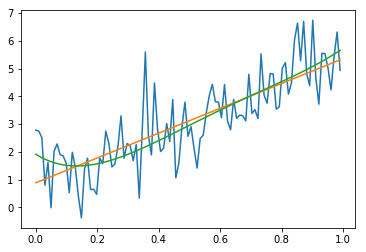

In [17]:
## Syntetyczny zbiór danych z dużym szumem ale liniowymi danymi
np.random.seed(123456789)

def y(x,m,b,mu=0,sigma=1.0): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)

for i in range(N): 
    domain[i] = i*domain_bound

for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)

plt.plot(domain, t)
    
tlr = ToLinearRegression(phi_1)
tlr.fit(domain, t)
plt.plot(domain, tlr.predict(domain))

tlr = ToLinearRegression(phi_2)
tlr.fit(domain, t)
plt.plot(domain, tlr.predict(domain))



In [18]:
w_pred = ToLinearRegression(phi=lambda x: [1, x]).fit(domain, t).w
assert np.abs(w_pred - np.array([0.88610652, 4.47519348])).max() < 0.05

## Cwiczenie 2 (4 pkt) - symulacja MAP 

W ostatnim zadaniu stworzyliśmy klasę ToyLinearRegression. W tym ćwiczeniu masz za zadanie oszacować jak będzie wyglądał posterior dla paru różnych rozkładów prior.

Niech prior będzie zdefiniowany poniższą funkcją. Niech $phi(x) = [1, x, x^2]$. Niech w[0]=0.88 na stałe. Niech sigma=1.0

a) Narysuj prior w[1] oraz w[2] (np. uzywajac meshgrid) dla C=1 i C=100 w zakresie [0, 10]. C=$\lambda^{-1}$, proszę też zobaczyć poniżej w definicji funkcji prior. Dodatkowy opis regularyzacji można także znaleźć w L4b "Estymator MAP"

b) Napisz funkcję o sygnaturze loglikelihood(w, X, Y, phi=lambda x: [1, x], sigma=1.0). 

c) Narysuj likelihood oraz posterior w[1] oraz w[2] dla C=0.1 i C=100 w zakresie [0, 10].  Dobierz tak sigma aby posterior miał wyraźny kształt "kulkowaty" jak na rysunku. 

d) Wyestymuj MAP oraz MLE dla C=0.1 i C=100. Co zauważyłeś? Z czego to wynika? (napisać)


### Hints

Hint: estymacja MAP/MLE polega na wybraniu argmaxa logposterior/loglikelihood po meshgrid

Hint: w c) nalezy liczyc *log* likelihood i *log* posterior

Hint: w d) uwaga, logposterior to nie ject loglikelihood*prior. Zastanowić się :)

Hint: funkcje prior należy wywoływać na całej macierzy punktów, nie tylko pojedynczych punktach. Będzie szybciej

### Co powinno wyjść

Prior: 

<img width=200 src="figures/L3/l3a_2_1.png">

C=100, od lewej: logprior/loglikelihood/logposterior: 

<img width=200 src="figures/L3/l3a_2_2.png">

C=0.1, od lewej: logprior/loglikelihood/logposterior: 

<img width=200 src="figures/L3/l3a_2_3.png">

In [19]:
import scipy
from scipy import stats
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [20]:
w_pred_2 = ToLinearRegression(phi=lambda x: [1, x, x**2.0]).fit(domain, t).w

In [21]:
def phi_3(x):
    return [1, x, x**2]

In [22]:
def prior(w, C, mean=[0.0, 3.0, 0.0]):
    assert w.ndim == 2
    
    sigma = np.zeros(shape=(w.shape[1], w.shape[1]))
    sigma[0,0] = 200 # Bias slabo zregularyzowany
    
    # Mozna ladniej zapisac
    for id in range(1, w.shape[1]):
        sigma[id, id] = C # Duze C -> malo zregularyzowany
        
    return scipy.stats.multivariate_normal.pdf(w,mean,sigma)

def logprior(w, C, mean=[0.0, 3.0, 0.0]):
    return np.log(prior(w, C, mean))

In [23]:
def loglikelihood(w, X, Y, phi=lambda x: [1, x], sigma=5.0):

    w = np.array(w).reshape(1, -1)
    X = np.array([phi(x) for x in X])
    Y = Y.reshape(-1, 1)
    
    Y_comp = X.dot(w.transpose())
    Y_diff = (Y - Y_comp)**2.0
    
    return (-(1/(2 * sigma**2.0))) * Y_diff.sum()

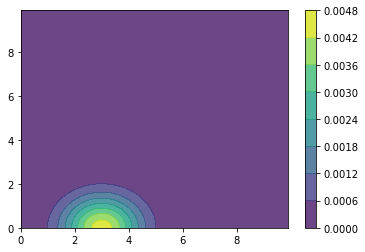

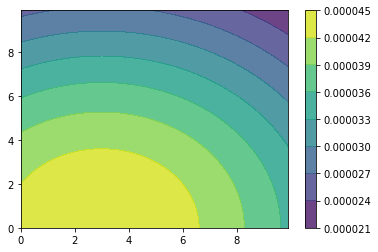

In [24]:
y = z = [q/10.0 for q in range(0, 100)]
yy, zz = np.meshgrid(y, z)
xx = np.ones(yy.shape) * 0.88

prior_100 = prior(np.c_[xx.ravel(), yy.ravel(), zz.ravel()], 100.0).reshape(yy.shape)
prior_1   = prior(np.c_[xx.ravel(), yy.ravel(), zz.ravel()], 1.0).reshape(yy.shape)

plt.contourf(yy, zz, prior_1, alpha=0.8, )
plt.colorbar() 
plt.show() 

plt.contourf(yy, zz, prior_100, alpha=0.8)
plt.colorbar() 
plt.show() 

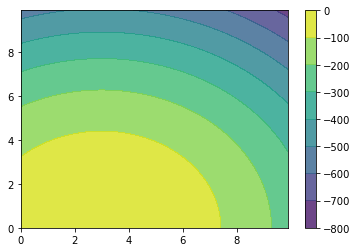

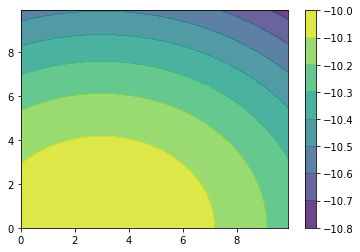

In [25]:
y = z = [q/10.0 for q in range(0, 100)]
yy, zz = np.meshgrid(y, z)
xx = np.ones(yy.shape) * 0.88

logprior_100 = logprior(np.c_[xx.ravel(), yy.ravel(), zz.ravel()], 100.0).reshape(yy.shape)
logprior_01 = logprior(np.c_[xx.ravel(), yy.ravel(), zz.ravel()], 0.1).reshape(yy.shape)

plt.contourf(yy, zz, logprior_01, alpha=0.8)
plt.colorbar() 
plt.show() 

plt.contourf(yy, zz, logprior_100, alpha=0.8)
plt.colorbar() 
plt.show() 

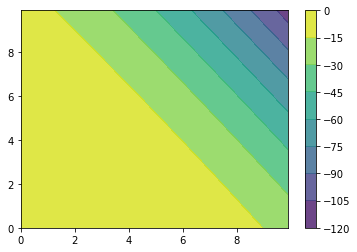

In [26]:
y = z = [q/10.0 for q in range(0, 100)]
yy, zz = np.meshgrid(y, z)
xx = np.ones(yy.shape) * 0.88

loglikelihood_01_100 = []

for [x, y, z] in np.c_[xx.ravel(), yy.ravel(), zz.ravel()]:
    loglikelihood_01_100.append(loglikelihood([x, y, z], domain, t, phi=lambda x: [1, x, x**2.0]))
    
loglikelihood_01_100 = np.array(loglikelihood_01_100).reshape(yy.shape)

plt.contourf(yy, zz, loglikelihood_01_100, alpha=0.8)
plt.colorbar() 
plt.show() 

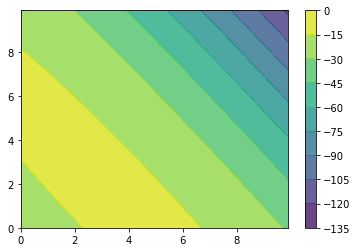

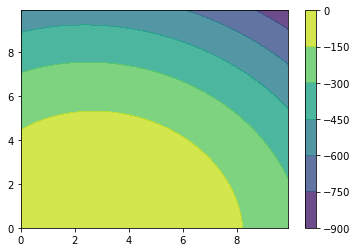

In [27]:
y = z = [q/10.0 for q in range(0, 100)]
yy, zz = np.meshgrid(y, z)
xx = np.ones(yy.shape) * 0.88

logposterior_100 = loglikelihood_01_100 + logprior_100
logposterior_01 = loglikelihood_01_100 + logprior_01


plt.contourf(yy, zz, logposterior_100, alpha=0.8)
plt.colorbar() 
plt.show() 

plt.contourf(yy, zz, logposterior_01, alpha=0.8)
plt.colorbar() 
plt.show() 

Ponieważ:
$$P(w_i|B) = \frac{L(w_i) \cdot prior(w_i)}{\sum L(w_i) \cdot prior(w_i))} = L(w_i) \cdot prior(w_i) \cdot K $$
to 
$$\log{( P(w_i|B) )} = \log{( L(w_i) \cdot prior(w_i) \cdot K )} = log{(L(w_i))} + log{(prior(w_i))} + log{(K)} $$

## Cwiczenie 3 (3 pkt) - MAP oraz co to znaczy dobra regularyzacja?

W tym ćwiczeniu Twoim zadaniem jest stworzenie klasy ToyBayesianLinearRegression, która nauczy model bayesowskiej regresji liniowej z wykorzystaniem liczenia bezposrednio wzoru na posterior.

Niech $phi(x) = [1, x, x^2]$, niech $sigma=1.0$

1. Podziel zbiór domain na zbiór trenujący i testujący uzywajac: ``X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)``

2. Zmodyfikuj ToyLinearRegression aby używał wzorów na MAP [źródło: Bishop, albo http://kudkudak.github.io/assets/pdf/talks/gp.pdf, albo L4b sekcja "Estymator MAP"]. 

** Uwaga: nie należy regularyzować biasu! ** (czyli nie $\lambda I$ ale diag(0, 1/C, 1/C))

3. Policz wynik na zbiorze tesującym modelu nauczonego na zbiorze trenującym z C=0.1 oraz C=100

4. Które C jest lepsze i dlaczego? Upewnij się, że Twój argument uwzględnia to jaki jest *prawdziwy* model danych.

Hint: Wersja Bayesowska sprowadza się do *bardzo prostej modyfikacji ćw 1*

In [28]:
class ToyBayesianLinearRegression:
    
    def __init__(self, C, phi):
        self.C = C
        self.phi = phi
        self.theta = None
    
    def fit(self, X, Y):
        X = np.array([self.phi(x) for x in domain])
        self.theta = np.linalg.inv((X.transpose().dot(X))  + np.diag([0, 1.0/self.C, 1.0/self.C]))
        self.theta = self.theta.dot(X.transpose()).dot(Y)
        return self
    
    def predict(self, X):
        X = np.array([self.phi(x) for x in domain])
        return self.theta.transpose().dot(X.transpose())
    
    @property
    def w(self):
        return self.theta


In [30]:
# 1. Maaala regularyzacja -> to samo co cw. 1. Polecam sprawdzic ze tak wychodzi w cw. 1 przy danym tutaj phi
w_pred = ToyBayesianLinearRegression(C=1000000, phi=lambda x: [1, x, x**2]).fit(domain, t).w
assert np.abs(w_pred - np.array([1.37, 1.475, 3.023])).max() < 0.05

# 2. Duza regularyzacja -> zabija obydwa
w_pred = ToyBayesianLinearRegression(C=0.01, phi=lambda x: [1, x, x**2]).fit(domain, t).w
assert np.abs(w_pred - np.array([2.832, 0.3217, 0.33])).max() < 0.05

# 3. Mala regularyzacja
w_pred = ToyBayesianLinearRegression(C=1, phi=lambda x: [1, x, x**2]).fit(domain, t).w
assert np.abs(w_pred - np.array([1.376, 1.944, 2.322])).max() < 0.05

# L3b

In [32]:
class DataSet:
    pass

from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = DataSet()
#     mnist = {
#         "data": mnist_raw["data"].T,
#         "target": mnist_raw["label"][0],
#         "COL_NAMES": ["label", "data"],
#         "DESCR": "mldata.org dataset: mnist-original",
#     }
    mnist.data = mnist_raw["data"].T
    mnist.target = mnist_raw["label"][0]
    mnist.COL_NAMES = ["label", "data"]
    mnist.DECAR = "mldata.org dataset: mnist-original"
    print("Success!")
    
import sklearn
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

#Wczytujemy dane i skalujemy
X, Y = mnist.data.astype("float64"), mnist.target 
X = preprocessing.scale(X)

#Dzielimy na dane trenujące i testujące
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

Could not download MNIST data from mldata.org, trying alternative...
Success!


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Cwiczenie 1 (1 pkt)

Prosze narysowac wykres (plt.plot) dokladnosci w zaleznosci od wartosci C na zbiorze treningowym i testowym (dla tych N=500 przykladow)

In [33]:
N = 500 # Podzbiór danych
C_s = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
results = []
models = []

for C_in in C_s:
    model = LogisticRegression(C=C_in)
    models.append(model)
    model.fit(X_train[0:N], Y_train[0:N])
    Y_test_predicted = model.predict(X_test)
    results.append(100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted))

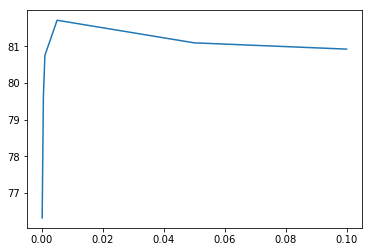

In [34]:
plt.plot(C_s, results)

### Cwiczenie 2 (2 pkt)

(Punkt za narysowanie oraz punkt za poprawne wytłumaczenie)

Proszę narysować jak wyglądaja nauczone wagi modelu dla różnych wartości parametru C (należy użyc plt.imshow). Z czego wynikają różnice w narysowanych obrazkach? 

Uwaga: wagi modelu regresji logistycznej są wymiaru (10, 28*28). Aby narysować wagi odpowiadające klasie "3" należy pobrać w[4]. Aby narysować to z użyciem imshow należy zrobić w[4].reshape(28, 28)

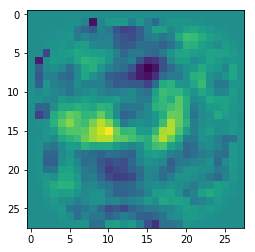

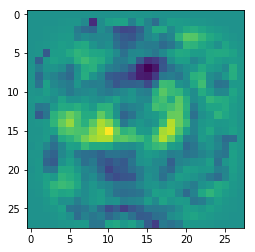

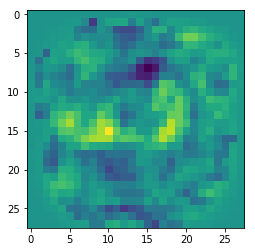

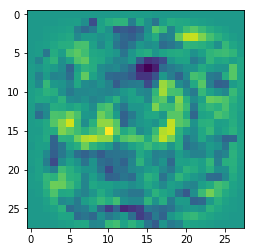

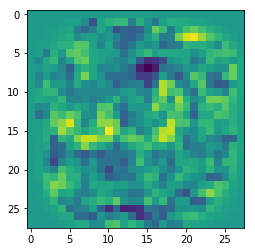

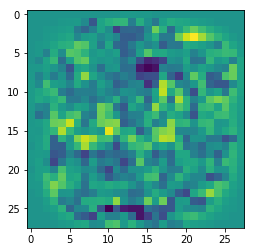

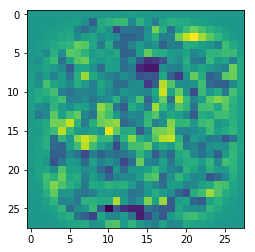

In [35]:
for model, i in zip(models, range(0, len(models))):
    plt.imshow(model.coef_[4].reshape(28, 28))
    plt.show()

Ponieważ w 'późniejszych' obrazkach jest zastosowana większa regularyzacja, mniejsze znaczenie dla wag mają przykłady ze zbioru trenującego, a większe zaczyna mieć zmniejszenie złożoności modelu, przez co trudniej jest wagą rosnąć, bo są 'ucinane' przez regularyzację.

# L4b

# Cwiczenie [3 pkt]

Proszę :
    1. Zapisać likelihood  modelu Naive Bayes w notacji jak powyżej (tj. p(Y | X, \theta) = ?)
    2. Zapisać wzór na estymator MLE w modelu Naive Bayes (w przypadku bernoulliego, tj. kiedy P(X_1 | Y) jest modelowane rozkładem bernoulliego) oraz uzasadnić jak do niego dojść w 1 zdaniu

1. $$L(\theta) = p(Y | X, \theta) \approx \exp \left(- \frac{1}{2 \sigma^2} \sum_{j=1}^{n} (y_i - (\theta .T) \cdot x_i ) \right)$$

2. $$P(y_1, ..., y_n | \theta) = \prod \theta^{y_i} (1-\theta)^{1-y_i}$$
Aby dojść do tego wzoru, należy rozpatrzeć jakie jest prawdopodobieństwo wyrzucenia danego ciągu zdarzeń $Y$ dla danego $\theta$.